# Figure 3a

Running requires a virtual environment where the umap package is installed.

Note that precise look of UMAP will change depending on random seed.

In [3]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
plt.rc('font', family='Helvetica')

In [4]:
ABE_LFC = pd.read_csv('ABE_LFC_FDR_df.csv')
CBE_LFC = pd.read_csv('CBE_LFC_FDR_df.csv')

LFC_comb = pd.concat((ABE_LFC, CBE_LFC))

lfc_table = LFC_comb[['gRNA_id', 'LFC_median_d15', 'LFC_median_spleen', 'LFC_median_bonemarrow', 'LFC_median_meninges']].reset_index(drop=True)
lfc_table

,gRNA_id,LFC_median_d15,LFC_median_spleen,LFC_median_bonemarrow,LFC_median_meninges
0,gRNA_1,-0.248177,-1.077769,-0.946780,-1.650615
1,gRNA_2,-0.889060,1.434236,1.495161,1.249886
2,gRNA_3,0.805668,-0.234645,0.058057,-0.225601
3,gRNA_67,-0.081705,0.626383,-0.115554,-0.946669
4,gRNA_84,0.314231,0.039434,-0.393134,-2.498806
...,...,...,...,...,...
14307,gRNA_14408,-0.464569,-2.425713,-2.048126,-2.594527
14308,gRNA_14409,0.297399,0.617171,0.204029,-1.634526
14309,gRNA_14410,-0.022546,-1.308803,-1.688895,-3.090144
14310,gRNA_14411,0.441562,0.432193,-0.651467,-2.776937


In [5]:
reducer = umap.UMAP(min_dist=0.8, )


In [6]:
embedded = reducer.fit_transform(lfc_table[['LFC_median_d15', 'LFC_median_spleen', 'LFC_median_bonemarrow', 'LFC_median_meninges']])

/var/folders/5g/xxjcy2g531n02hnyb6d8qdsr0000gn/T/ipykernel_90425/3396904377.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("seismic")


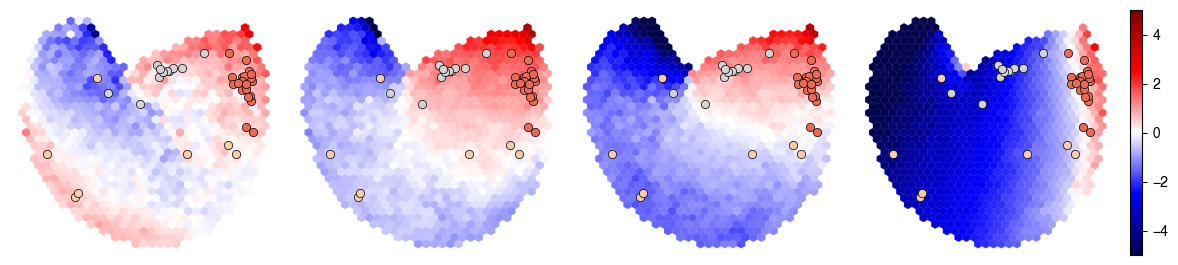

In [7]:
g_list = [['gRNA_12301',
  'gRNA_1840',
  'gRNA_3670',
  'gRNA_8831',
  'gRNA_2401',
  'gRNA_6745',
  'gRNA_3570'],
 ['gRNA_13064',
  'gRNA_7807',
  'gRNA_2051',
  'gRNA_2',
  'gRNA_10211',
  'gRNA_3233',
  'gRNA_3238',
  'gRNA_10757',
  'gRNA_3765',
  'gRNA_631',
  'gRNA_10312',
  'gRNA_1086',
  'gRNA_2295',
  'gRNA_2524',
  'gRNA_3742',
  'gRNA_4578',
  'gRNA_677',
  'gRNA_14337',
  'gRNA_9020',
  'gRNA_1765',
  'gRNA_1592',
  'gRNA_4105'],
 ['gRNA_5054',
  'gRNA_2218',
  'gRNA_5978',
  'gRNA_7652',
  'gRNA_10884',
  'gRNA_1719',
  'gRNA_7038',
  'gRNA_13228',
  'gRNA_949',
  'gRNA_3136',
  'gRNA_7502',
  'gRNA_7709']]


palette = ['#F9CBA8', '#ED6A50',  'lightgrey', '#7284A1','darkslategray']

fig, ax = plt.subplots(1,4,figsize=(12,2.75), width_ratios = [1,1,1,1.2], sharey=True, sharex=True)
samples = ['LFC_median_d15', 'LFC_median_spleen', 'LFC_median_bonemarrow', 'LFC_median_meninges']

vmin = -5
vmax = 5

#ax[0].hexbin(embedded[:,0], embedded[:,1], )

for i, val in enumerate(samples):
    #i = i+1
    im = ax[i].hexbin(embedded[:,0], embedded[:,1], C=lfc_table[val], vmin=vmin, vmax=vmax,gridsize=30, linewidths=.2, cmap='seismic', bins=None)
    #ax[i].set_title(val, fontsize=16)
    ax[i].spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax[i].tick_params(axis='both', which='major', labelsize=16);
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    #for i in men_high_embedded:
    for idx, k in enumerate(g_list):
        gene_of_interest = embedded[lfc_table[lfc_table['gRNA_id'].isin(k)].index]
        ax[i].scatter(gene_of_interest[:,0], gene_of_interest[:,1],  alpha=1, color=palette[idx], edgecolor='black', linewidth=.5)


cmap = cm.get_cmap("seismic")
norm = colors.Normalize(vmin, vmax)

fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax[3])
#plt.scatter(embedded[:,0], embedded[:,1])
fig.tight_layout()
#fig.savefig('figures/UMAP_scatter_v2.pdf', transparent=True)